In [1]:
# Python imports
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import wordnet as wn
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
C:\Users\ujwal\Twin_tower_model\twin_model\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# KELSEC method

In [8]:
# def get_senses(word):
#     senses = wn.synsets(word)
#     return senses

# def print_senses(senses):
#     for i, s in enumerate(senses):
#         print(f"SENSE {i+1}: {s.name()}")
#         print(f"Definition: {s.definition()}")
#         examples = s.examples()
#         if examples:
#             print(f"Examples: {examples}")
#         print('---')

# word = "bank"
# senses = get_senses(word)
# print_senses(senses)


In [9]:
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# def get_bert_embedding(text):
#     inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=50)
#     outputs = model(**inputs)
#     # Take mean of last hidden states (pooled sentence embedding)
#     embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
#     return embedding


In [10]:
# context_sentence = "I sat by the river bank and enjoyed the sunset."
# context_emb = get_bert_embedding(context_sentence)


In [11]:
# def get_gloss_text(sense):
#     gloss = sense.definition()
#     examples = ' '.join(sense.examples())
#     enriched = gloss + ' ' + examples
#     return enriched

# sense_embeddings = []
# for s in senses:
#     gloss_text = get_gloss_text(s)
#     emb = get_bert_embedding(gloss_text)
#     sense_embeddings.append(emb)


In [12]:
# def compute_similarity(context_emb, sense_embeddings):
#     sims = []
#     for se in sense_embeddings:
#         sim = cosine_similarity(context_emb, se)[0][0]
#         sims.append(sim)
#     return sims

# similarities = compute_similarity(context_emb, sense_embeddings)

# for i, sim in enumerate(similarities):
#     print(f"SENSE {i+1}: {senses[i].name()} | Similarity: {sim:.4f}")


In [13]:
# best_idx = np.argmax(similarities)
# best_sense = senses[best_idx]

# print(f"\n✅ Best sense predicted: {best_sense.name()}")
# print(f"Definition: {best_sense.definition()}")


# Neurosymbolic DartBoard Embedding

In [14]:
def get_senses(word):
    return wn.synsets(word)

def get_gloss_text(sense):
    gloss = sense.definition()
    examples = ' '.join(sense.examples())
    return gloss + ' ' + examples

word = "bank"
senses = get_senses(word)

for i, s in enumerate(senses):
    print(f"SENSE {i+1}: {s.name()} | Definition: {s.definition()}")


SENSE 1: bank.n.01 | Definition: sloping land (especially the slope beside a body of water)
SENSE 2: depository_financial_institution.n.01 | Definition: a financial institution that accepts deposits and channels the money into lending activities
SENSE 3: bank.n.03 | Definition: a long ridge or pile
SENSE 4: bank.n.04 | Definition: an arrangement of similar objects in a row or in tiers
SENSE 5: bank.n.05 | Definition: a supply or stock held in reserve for future use (especially in emergencies)
SENSE 6: bank.n.06 | Definition: the funds held by a gambling house or the dealer in some gambling games
SENSE 7: bank.n.07 | Definition: a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
SENSE 8: savings_bank.n.02 | Definition: a container (usually with a slot in the top) for keeping money at home
SENSE 9: bank.n.09 | Definition: a building in which the business of banking transacted
SENSE 10: bank.n.10 | Definition: 

In [16]:
from sklearn.preprocessing import normalize

In [17]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=50)
    outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embedding

# Embed glosses
sense_embeddings = []
for s in senses:
    gloss_text = get_gloss_text(s)
    emb = get_bert_embedding(gloss_text)
    sense_embeddings.append(emb)

# Normalize all sense embeddings to unit vectors (on sphere)
sense_embeddings_norm = normalize(np.vstack(sense_embeddings))


In [18]:
context_sentence = "I deposited cash at the bank yesterday."
context_emb = get_bert_embedding(context_sentence)
context_emb_norm = normalize(context_emb)


In [19]:
similarities = np.dot(sense_embeddings_norm, context_emb_norm.T).flatten()

for i, sim in enumerate(similarities):
    print(f"SENSE {i+1}: {senses[i].name()} | Similarity: {sim:.4f}")


SENSE 1: bank.n.01 | Similarity: 0.5577
SENSE 2: depository_financial_institution.n.01 | Similarity: 0.6574
SENSE 3: bank.n.03 | Similarity: 0.5127
SENSE 4: bank.n.04 | Similarity: 0.4537
SENSE 5: bank.n.05 | Similarity: 0.5407
SENSE 6: bank.n.06 | Similarity: 0.5734
SENSE 7: bank.n.07 | Similarity: 0.5114
SENSE 8: savings_bank.n.02 | Similarity: 0.6528
SENSE 9: bank.n.09 | Similarity: 0.5485
SENSE 10: bank.n.10 | Similarity: 0.4578
SENSE 11: bank.v.01 | Similarity: 0.4295
SENSE 12: bank.v.02 | Similarity: 0.5585
SENSE 13: bank.v.03 | Similarity: 0.6660
SENSE 14: bank.v.04 | Similarity: 0.5356
SENSE 15: bank.v.05 | Similarity: 0.5576
SENSE 16: deposit.v.02 | Similarity: 0.6540
SENSE 17: bank.v.07 | Similarity: 0.4616
SENSE 18: trust.v.01 | Similarity: 0.5648


In [20]:
best_idx = np.argmax(similarities)
best_sense = senses[best_idx]
print(f"\n✅ Predicted sense: {best_sense.name()}")
print(f"Definition: {best_sense.definition()}")



✅ Predicted sense: bank.v.03
Definition: do business with a bank or keep an account at a bank


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



=== Original NDE (Cosine Similarity) ===
SENSE 1: bank.n.01 | Similarity: 0.5577
SENSE 2: depository_financial_institution.n.01 | Similarity: 0.6574
SENSE 3: bank.n.03 | Similarity: 0.5127
SENSE 4: bank.n.04 | Similarity: 0.4537
SENSE 5: bank.n.05 | Similarity: 0.5407
SENSE 6: bank.n.06 | Similarity: 0.5734
SENSE 7: bank.n.07 | Similarity: 0.5114
SENSE 8: savings_bank.n.02 | Similarity: 0.6528
SENSE 9: bank.n.09 | Similarity: 0.5485
SENSE 10: bank.n.10 | Similarity: 0.4578
SENSE 11: bank.v.01 | Similarity: 0.4295
SENSE 12: bank.v.02 | Similarity: 0.5585
SENSE 13: bank.v.03 | Similarity: 0.6660
SENSE 14: bank.v.04 | Similarity: 0.5356
SENSE 15: bank.v.05 | Similarity: 0.5576
SENSE 16: deposit.v.02 | Similarity: 0.6540
SENSE 17: bank.v.07 | Similarity: 0.4616
SENSE 18: trust.v.01 | Similarity: 0.5648

=== Modified NDE (Mahalanobis Distance) ===
SENSE 1: bank.n.01 | Mahalanobis Distance: 1368993472.7166
SENSE 2: depository_financial_institution.n.01 | Mahalanobis Distance: 1368993505.186

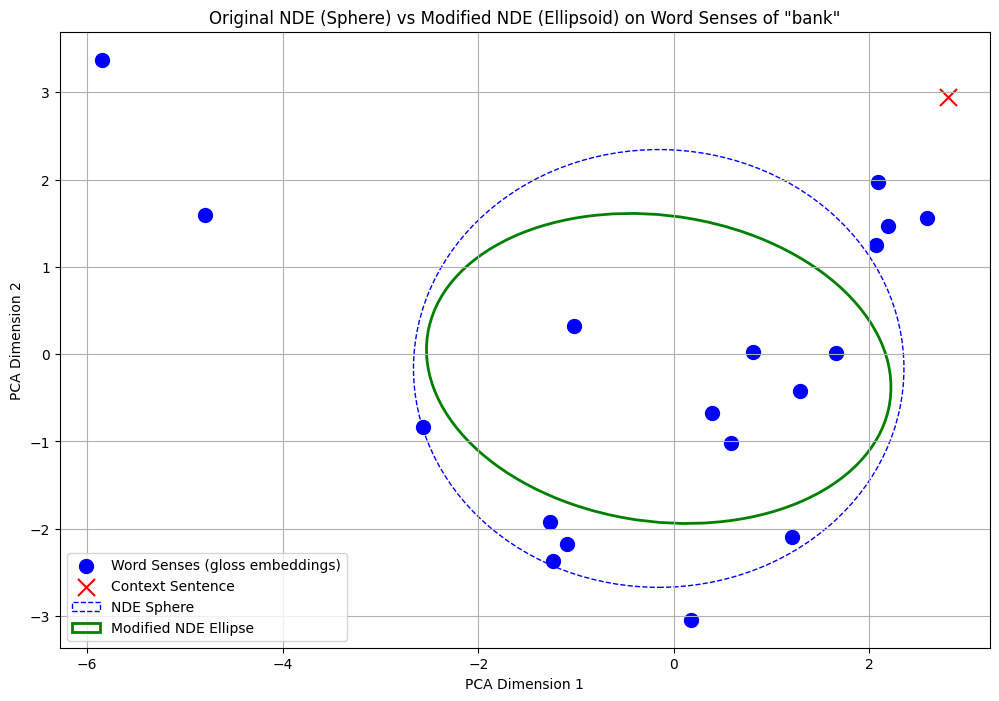


=== Region Details ===
Circle radius (NDE): 2.5076
Ellipse widths: 4.7920, 3.4939 | Angle: 168.80 degrees


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import EmpiricalCovariance
from nltk.corpus import wordnet as wn
from transformers import BertTokenizer, BertModel
from matplotlib.patches import Ellipse
import torch
import nltk
nltk.download('wordnet')

# ----- Functions to get WordNet senses and glosses -----
def get_senses(word):
    return wn.synsets(word)

def get_gloss_text(sense):
    gloss = sense.definition()
    examples = ' '.join(sense.examples())
    return gloss + ' ' + examples

# ----- Load BERT model -----
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=50)
    outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embedding

# ----- Get sense embeddings -----
word = "bank"
senses = get_senses(word)

sense_embeddings = []
for s in senses:
    gloss_text = get_gloss_text(s)
    emb = get_bert_embedding(gloss_text)
    sense_embeddings.append(emb)

sense_embeddings = np.vstack(sense_embeddings)

# ----- Normalize for original NDE (on sphere) -----
sense_embeddings_norm = normalize(sense_embeddings)

# ----- Get context sentence embedding -----
context_sentence = "I deposited cash at the bank yesterday."
context_emb = get_bert_embedding(context_sentence)
context_emb_norm = normalize(context_emb)

# ----- Original NDE - Cosine Similarity -----
similarities = np.dot(sense_embeddings_norm, context_emb_norm.T).flatten()

print("\n=== Original NDE (Cosine Similarity) ===")
for i, sim in enumerate(similarities):
    print(f"SENSE {i+1}: {senses[i].name()} | Similarity: {sim:.4f}")

# ----- Modified NDE - Mahalanobis Distance (Ellipsoidal) -----
# Compute empirical covariance of sense embeddings
cov_estimator = EmpiricalCovariance().fit(sense_embeddings)
center = np.mean(sense_embeddings, axis=0)

mahal_distances = []
for emb in sense_embeddings:
    dist = mahalanobis(context_emb.flatten(), emb, np.linalg.inv(cov_estimator.covariance_))
    mahal_distances.append(dist)

print("\n=== Modified NDE (Mahalanobis Distance) ===")
for i, dist in enumerate(mahal_distances):
    print(f"SENSE {i+1}: {senses[i].name()} | Mahalanobis Distance: {dist:.4f}")

# ----- Visualize both methods on 2D PCA -----
pca = PCA(n_components=2)
all_points = np.vstack([sense_embeddings, context_emb])
proj = pca.fit_transform(all_points)

proj_senses = proj[:-1]
proj_context = proj[-1]

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(proj_senses[:,0], proj_senses[:,1], c='blue', s=100, label='Word Senses (gloss embeddings)')
plt.scatter(proj_context[0], proj_context[1], c='red', marker='x', s=150, label='Context Sentence')

# Draw circle (Original NDE sphere assumption)
mean_x, mean_y = np.mean(proj_senses, axis=0)
radius = np.linalg.norm(proj_senses - np.array([mean_x, mean_y]), axis=1).mean()
circle = plt.Circle((mean_x, mean_y), radius, color='blue', fill=False, linestyle='--', label='NDE Sphere')
ax.add_artist(circle)

# Draw ellipse (Modified NDE ellipsoid assumption)
cov_proj = np.cov(proj_senses, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(cov_proj)
order = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[order], eigvecs[:,order]
angle = np.degrees(np.arctan2(*eigvecs[:,0][::-1]))
width, height = 2 * np.sqrt(eigvals)
ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, fill=False, edgecolor='green', linestyle='-', linewidth=2, label='Modified NDE Ellipse')
ax.add_artist(ellipse)

plt.legend()
plt.title('Original NDE (Sphere) vs Modified NDE (Ellipsoid) on Word Senses of "bank"')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.grid(True)
plt.show()

# ----- Print ellipse/circle details -----
print("\n=== Region Details ===")
print(f"Circle radius (NDE): {radius:.4f}")
print(f"Ellipse widths: {width:.4f}, {height:.4f} | Angle: {angle:.2f} degrees")


Enter your context sentence:  After finishing his morning jog along the grassy bank of the river, where the sunlight shimmered on the calm water and birds chirped among the reeds, John stopped by the nearby bank to deposit a check into his savings account before heading to the office



=== Original NDE (Cosine Similarity) ===
SENSE 1: bank.n.01 | Similarity: 0.7616
SENSE 2: depository_financial_institution.n.01 | Similarity: 0.7003
SENSE 3: bank.n.03 | Similarity: 0.5933
SENSE 4: bank.n.04 | Similarity: 0.5440
SENSE 5: bank.n.05 | Similarity: 0.5650
SENSE 6: bank.n.06 | Similarity: 0.6487
SENSE 7: bank.n.07 | Similarity: 0.6088
SENSE 8: savings_bank.n.02 | Similarity: 0.6673
SENSE 9: bank.n.09 | Similarity: 0.6389
SENSE 10: bank.n.10 | Similarity: 0.5498
SENSE 11: bank.v.01 | Similarity: 0.4463
SENSE 12: bank.v.02 | Similarity: 0.4999
SENSE 13: bank.v.03 | Similarity: 0.6684
SENSE 14: bank.v.04 | Similarity: 0.5771
SENSE 15: bank.v.05 | Similarity: 0.4908
SENSE 16: deposit.v.02 | Similarity: 0.6455
SENSE 17: bank.v.07 | Similarity: 0.5575
SENSE 18: trust.v.01 | Similarity: 0.6288


C:\Users\ujwal\Twin_tower_model\twin_model\Lib\site-packages\scipy\spatial\distance.py:1035: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)



=== Modified NDE (Mahalanobis Distance) ===
SENSE 1: bank.n.01 | Mahalanobis Distance: nan
SENSE 2: depository_financial_institution.n.01 | Mahalanobis Distance: nan
SENSE 3: bank.n.03 | Mahalanobis Distance: nan
SENSE 4: bank.n.04 | Mahalanobis Distance: nan
SENSE 5: bank.n.05 | Mahalanobis Distance: nan
SENSE 6: bank.n.06 | Mahalanobis Distance: nan
SENSE 7: bank.n.07 | Mahalanobis Distance: nan
SENSE 8: savings_bank.n.02 | Mahalanobis Distance: nan
SENSE 9: bank.n.09 | Mahalanobis Distance: nan
SENSE 10: bank.n.10 | Mahalanobis Distance: nan
SENSE 11: bank.v.01 | Mahalanobis Distance: nan
SENSE 12: bank.v.02 | Mahalanobis Distance: nan
SENSE 13: bank.v.03 | Mahalanobis Distance: nan
SENSE 14: bank.v.04 | Mahalanobis Distance: nan
SENSE 15: bank.v.05 | Mahalanobis Distance: nan
SENSE 16: deposit.v.02 | Mahalanobis Distance: nan
SENSE 17: bank.v.07 | Mahalanobis Distance: nan
SENSE 18: trust.v.01 | Mahalanobis Distance: nan


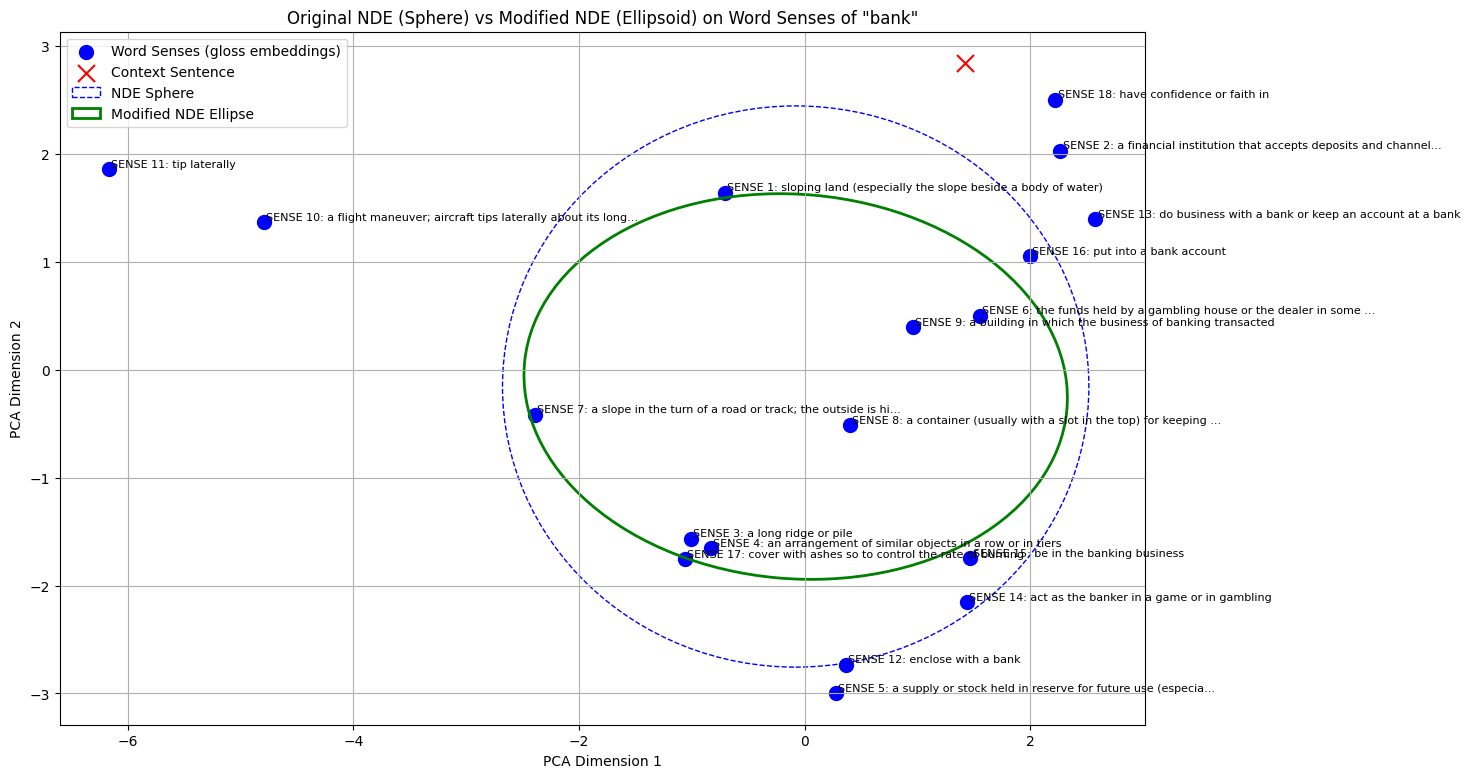


=== Region Details ===
Circle radius (NDE): 2.5983
Ellipse widths: 4.8258, 3.5580 | Angle: 174.56 degrees


In [25]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import normalize
# from scipy.spatial.distance import mahalanobis
# from sklearn.covariance import EmpiricalCovariance
# from nltk.corpus import wordnet as wn
# from transformers import BertTokenizer, BertModel
# from matplotlib.patches import Ellipse
# import torch
# import nltk
# nltk.download('wordnet')

# ----- Functions to get WordNet senses and glosses -----
def get_senses(word):
    return wn.synsets(word)

def get_gloss_text(sense):
    gloss = sense.definition()
    examples = ' '.join(sense.examples())
    return gloss + ' ' + examples

# ----- Load BERT model -----
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=50)
    outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embedding

# ----- Get sense embeddings -----
word = "bank"
senses = get_senses(word)

sense_embeddings = []
for s in senses:
    gloss_text = get_gloss_text(s)
    emb = get_bert_embedding(gloss_text)
    sense_embeddings.append(emb)

sense_embeddings = np.vstack(sense_embeddings)

# ----- Normalize for original NDE (on sphere) -----
sense_embeddings_norm = normalize(sense_embeddings)

# ----- Get context sentence embedding -----
context_sentence = input("Enter your context sentence: ")
context_emb = get_bert_embedding(context_sentence)
context_emb_norm = normalize(context_emb)

# ----- Original NDE - Cosine Similarity -----
similarities = np.dot(sense_embeddings_norm, context_emb_norm.T).flatten()

print("\n=== Original NDE (Cosine Similarity) ===")
for i, sim in enumerate(similarities):
    print(f"SENSE {i+1}: {senses[i].name()} | Similarity: {sim:.4f}")

# ----- Modified NDE - Mahalanobis Distance (Ellipsoidal) -----
# Compute empirical covariance of sense embeddings
cov_estimator = EmpiricalCovariance().fit(sense_embeddings)
center = np.mean(sense_embeddings, axis=0)

mahal_distances = []
for emb in sense_embeddings:
    dist = mahalanobis(context_emb.flatten(), emb, np.linalg.inv(cov_estimator.covariance_))
    mahal_distances.append(dist)

print("\n=== Modified NDE (Mahalanobis Distance) ===")
for i, dist in enumerate(mahal_distances):
    print(f"SENSE {i+1}: {senses[i].name()} | Mahalanobis Distance: {dist:.4f}")

# ----- Visualize both methods on 2D PCA -----
pca = PCA(n_components=2)
all_points = np.vstack([sense_embeddings, context_emb])
proj = pca.fit_transform(all_points)

proj_senses = proj[:-1]
proj_context = proj[-1]

fig, ax = plt.subplots(figsize=(14, 9))
plt.scatter(proj_senses[:,0], proj_senses[:,1], c='blue', s=100, label='Word Senses (gloss embeddings)')
plt.scatter(proj_context[0], proj_context[1], c='red', marker='x', s=150, label='Context Sentence')

# Annotate each sense point with its definition
for i, s in enumerate(senses):
    gloss = s.definition()
    short_gloss = gloss if len(gloss) < 60 else gloss[:57] + '...'
    plt.annotate(f"SENSE {i+1}: {short_gloss}", (proj_senses[i,0]+0.02, proj_senses[i,1]+0.02), fontsize=8)

# Draw circle (Original NDE sphere assumption)
mean_x, mean_y = np.mean(proj_senses, axis=0)
radius = np.linalg.norm(proj_senses - np.array([mean_x, mean_y]), axis=1).mean()
circle = plt.Circle((mean_x, mean_y), radius, color='blue', fill=False, linestyle='--', label='NDE Sphere')
ax.add_artist(circle)

# Draw ellipse (Modified NDE ellipsoid assumption)
cov_proj = np.cov(proj_senses, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(cov_proj)
order = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[order], eigvecs[:,order]
angle = np.degrees(np.arctan2(*eigvecs[:,0][::-1]))
width, height = 2 * np.sqrt(eigvals)
ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, fill=False, edgecolor='green', linestyle='-', linewidth=2, label='Modified NDE Ellipse')
ax.add_artist(ellipse)

plt.legend()
plt.title('Original NDE (Sphere) vs Modified NDE (Ellipsoid) on Word Senses of "bank"')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.grid(True)
plt.show()

# ----- Print ellipse/circle details -----
print("\n=== Region Details ===")
print(f"Circle radius (NDE): {radius:.4f}")
print(f"Ellipse widths: {width:.4f}, {height:.4f} | Angle: {angle:.2f} degrees")